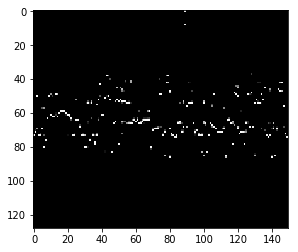

In [37]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

#spectro_file = os.path.join ('..', 'fft', 'test', 'c-major-scale-on-treble-clef.png')
#spectro_file = os.path.join ('..', '..', 'src_spectro', '8-0', 'TRIZVHE128EF351C4E.png')
#spectro_file = os.path.join ('..', '..', 'src_spectro', '7-0', 'TRUIIZI12903D00069.png')
spectro_file = os.path.join ('..', '..', 'src_spectro', '7-1', 'TRNIWUC128F4284F76.png')

img = Image.open (spectro_file).convert (mode='L')

plt.imshow (img)
plt.show ()

In [38]:
img.size

(150, 128)

In [39]:
img_arr = np.array (img)
img_arr.shape

(128, 150)

In [40]:
print (img_arr.shape[0]-np.argmax (img_arr, axis=0))

[ 55  57  78  55  55  59  48  52  65  78  67  66  66  79  66  68  69  69
  69  68  67  67  65  55  55  64  64  60  55  55  48  48  74  52  74  55
  51  55  76  85  67  67  77  90  78  76  45  62  63  76  75  76  75  75
  75  74  74  62  62  64  63  64  62  62  63  64  64  64  69  48  58  59
  59  59  79  79  55  57  86  90  81  56  55  54  55  62  63  57  60 128
  72  74  74  74  62  57  58  55  55  55  74  62  45  55  62  61  79  59
  57  57  57  57  59  43  64  64  62  50  80  79  78  56  57  57  50  62
  79  60  80  60  74  76  74  74  79  76  83  55  54  55  42  59  43  59
  82  81  86  72  56  54]


In [41]:
# run through all time chunks, get the corresponding pitch and add it to a list if not already in list

list_of_pitches_midi = np.empty (1).astype (int)
max_pitch_midi = img_arr.shape[0]
for i in range (img_arr.shape[1]):
    
    # check first if we have absolute silence in this time chunk = all values are zero
    if (img_arr[:,i].sum () == 0):
        continue
    
    pitch_midi = max_pitch_midi - img_arr[:,i].argmax ()
    if pitch_midi not in list_of_pitches_midi:
        list_of_pitches_midi = np.append (list_of_pitches_midi, pitch_midi)

list_of_pitches_midi = list_of_pitches_midi[1:]
print (list_of_pitches_midi)

[ 55  57  78  59  48  52  65  67  66  79  68  69  64  60  74  51  76  85
  77  90  45  62  63  75  58  86  81  56  54 128  72  61  43  50  80  83
  42  82]


In [42]:
# function: get key of array pixel value
import math

def get_music_key (arr_val):
    tone = arr_val % 12
    octave = math.floor (arr_val / 12) - 1
    
    return tone, octave

In [43]:
dict_music_keys = {'C':0, 'C#':1, 'D':2, 'D#':3, 'E':4, 'F':5, 'F#':6, 'G':7, 'G#':8, 'A':9, 'A#':10, 'B':11}

In [44]:
for arr_val in list_of_pitches_midi:
    for dict_key, dict_value in dict_music_keys.items ():
        tone, octave = get_music_key (arr_val)
        if (tone == dict_value):
            print ('{}{}'.format (dict_key, octave), end=', ', flush=True)
print ()

G3, A3, F#5, B3, C3, E3, F4, G4, F#4, G5, G#4, A4, E4, C4, D5, D#3, E5, C#6, F5, F#6, A2, D4, D#4, D#5, A#3, D6, A5, G#3, F#3, G#9, C5, C#4, G2, D3, G#5, B5, F#2, A#5, 


## Octave Transposition
---
"In music transposition refers to the process, or operation, of moving a collection of notes (pitches or pitch classes) up or down in pitch by a constant interval." (<a href='https://en.wikipedia.org/wiki/Transposition_(music)'>Wikipedia - Transposition (music)</a>)

_

*Octave Equivalency*

"[...] notes an octave apart are given the same note name in the Western system of music notation — the name of a note an octave above A is also A. This is called octave equivalency, the assumption that pitches one or more octaves apart are musically equivalent in many ways [...]" (<a href='https://en.wikipedia.org/wiki/Octave#Theory'>Wikipedia - Octave, Theory</a>)

_

*Transpositional Equivalence*

"Using integer notation and modulo 12, to transpose a pitch x by n semitones (pitch class transposition by a pitch class interval):" (<a href='https://en.wikipedia.org/wiki/Transposition_(music)#Transpositional_equivalence'>Wikipedia - Transpositional Equivalence</a>)

$T_n(x) = x + n (mod 12)$

_

"Transposing a melody up or down by one octave will not change the key." (<a href='http://brebru.com/musicroom/theory/lesson18/octavetrans.html'>brebru - octave transposition</a>)

In [45]:
# check if min/max value out of 12-TET bounds after transposition
semitones_to_transpose = 12
min_oob = False
max_oob = False

if (list_of_pitches_midi.min ()-semitones_to_transpose < 0):
    print ('  [i] min pitch would be out of bounds after transposition')
    min_oob = True
if (list_of_pitches_midi.max ()+semitones_to_transpose > 127):
    print ('  [i] max pitch would be out of bounds after transposition')
    max_oob = True

if (min_oob or max_oob):
    pass

  [i] max pitch would be out of bounds after transposition


In [46]:
# go through every column of the image and move every value 12 indices up (or down)

# - one octave up
# array with 12 more rows
img_arr_oct_up = np.copy (img_arr[semitones_to_transpose:])
img_arr_oct_up = np.vstack ((img_arr_oct_up, np.zeros ((semitones_to_transpose, img_arr_oct_up.shape[1]))))


# - one octave down
img_arr_oct_dwn = np.copy (img_arr[:-semitones_to_transpose])
img_arr_oct_dwn = np.vstack ((np.zeros ((semitones_to_transpose, img_arr_oct_dwn.shape[1])), img_arr_oct_dwn))

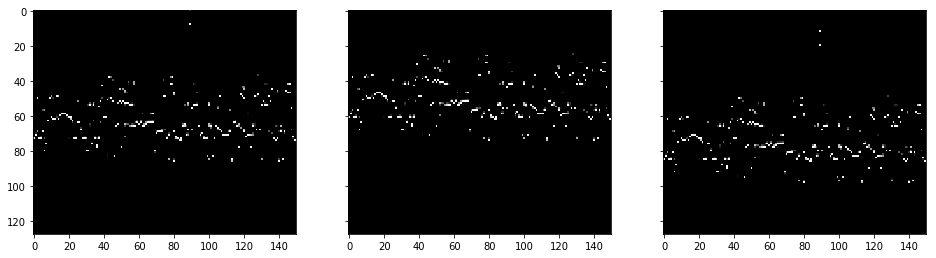

In [47]:
img_oct_up = Image.fromarray (img_arr_oct_up)
img_oct_dwn = Image.fromarray (img_arr_oct_dwn)

fig, axs= plt.subplots (1, 3, sharex=True, sharey=True)
axs[0].imshow (img)
axs[1].imshow (img_oct_up)
axs[2].imshow (img_oct_dwn)

fig.set_size_inches (16, 14)
plt.show ()

In [48]:
list_of_pitches_midi_oct_up = np.empty (1).astype (int)
max_pitch_midi_oct_up = img_arr_oct_up.shape[0]
for i in range (img_arr_oct_up.shape[1]):
    
    # check first if we have absolute silence in this time chunk = all values are zero
    if (img_arr_oct_up[:,i].sum () == 0):
        continue
    
    pitch_midi = max_pitch_midi_oct_up - img_arr_oct_up[:,i].argmax ()
    if pitch_midi not in list_of_pitches_midi_oct_up:
        list_of_pitches_midi_oct_up = np.append (list_of_pitches_midi_oct_up, pitch_midi)

list_of_pitches_midi_oct_up = list_of_pitches_midi_oct_up[1:]
print (list_of_pitches_midi_oct_up)



list_of_pitches_midi_oct_dwn = np.empty (1).astype (int)
max_pitch_midi_oct_dwn = img_arr_oct_dwn.shape[0]
for i in range (img_arr_oct_dwn.shape[1]):
    
    # check first if we have absolute silence in this time chunk = all values are zero
    if (img_arr_oct_dwn[:,i].sum () == 0):
        continue
    
    pitch_midi = max_pitch_midi_oct_dwn - img_arr_oct_dwn[:,i].argmax ()
    if pitch_midi not in list_of_pitches_midi_oct_dwn:
        list_of_pitches_midi_oct_dwn = np.append (list_of_pitches_midi_oct_dwn, pitch_midi)

list_of_pitches_midi_oct_dwn = list_of_pitches_midi_oct_dwn[1:]
print (list_of_pitches_midi_oct_dwn)

[ 67  69  90  71  60  64  77  79  78  91  80  81  76  72  86  63  88  97
  89 102  57  74  75  87  70  98  93  68  66  84  73  55  62  92  95  54
  94]
[ 43  45  66  47  36  40  53  55  54  67  56  57  52  48  62  39  64  73
  65  78  33  50  51  63  46  74  69  44  42 116  60  49  31  38  68  71
  30  70]


In [49]:
for arr_val in list_of_pitches_midi_oct_up:
    for dict_key, dict_value in dict_music_keys.items ():
        tone, octave = get_music_key (arr_val)
        if (tone == dict_value):
            print ('{}{}'.format (dict_key, octave), end=', ', flush=True)
print ()

for arr_val in list_of_pitches_midi_oct_dwn:
    for dict_key, dict_value in dict_music_keys.items ():
        tone, octave = get_music_key (arr_val)
        if (tone == dict_value):
            print ('{}{}'.format (dict_key, octave), end=', ', flush=True)
print ()

print ()
for arr_val in list_of_pitches_midi:
    for dict_key, dict_value in dict_music_keys.items ():
        tone, octave = get_music_key (arr_val)
        if (tone == dict_value):
            print ('{}{}'.format (dict_key, octave), end=', ', flush=True)
print ()

G4, A4, F#6, B4, C4, E4, F5, G5, F#5, G6, G#5, A5, E5, C5, D6, D#4, E6, C#7, F6, F#7, A3, D5, D#5, D#6, A#4, D7, A6, G#4, F#4, C6, C#5, G3, D4, G#6, B6, F#3, A#6, 
G2, A2, F#4, B2, C2, E2, F3, G3, F#3, G4, G#3, A3, E3, C3, D4, D#2, E4, C#5, F4, F#5, A1, D3, D#3, D#4, A#2, D5, A4, G#2, F#2, G#8, C4, C#3, G1, D2, G#4, B4, F#1, A#4, 

G3, A3, F#5, B3, C3, E3, F4, G4, F#4, G5, G#4, A4, E4, C4, D5, D#3, E5, C#6, F5, F#6, A2, D4, D#4, D#5, A#3, D6, A5, G#3, F#3, G#9, C5, C#4, G2, D3, G#5, B5, F#2, A#5, 
